In [3]:
import numpy as np
import ROOT
import tdrstyle as tdr
import os
from matplotlib import rcParams, cycler
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from array import array
import math

ROOT.gStyle.SetOptStat(0)

tdr.setTDRStyle()

In [2]:
dic_Z={'Si':28.,
       'S':32.,
       'Ca':40.,
       'Ni':58.,
       'Cu':62.,
       'Au':197.,
       'Pb':207.}

dic_a={'Si':0.580,
       'S':2.191,
       'Ca':0.586,
       'Ni':0.517,
       'Cu':0.596,
       'Au':0.535,
       'Pb':0.546}

dic_w={'Si':-0.233,
       'S':0.16,
       'Ca':-0.161,
       'Ni':-0.1308,
       'Cu':0.,
       'Au':0.,
       'Pb':0.}

In [3]:
def Setup_ellipse(t):
    list_ellipse = []
    list_idxpart = []
    for i in range(t.Nucleon_x.size()):
        elp = ROOT.TEllipse(t.Nucleon_x[i], t.Nucleon_y[i],
                            t.Nucleon_D[i] / 2.,
                            t.Nucleon_D[i] / 2.)
        elp.SetFillStyle(0)
        elp.SetLineStyle(7)
        if t.Nucleon_IsPart[i] == 1:
            list_idxpart.append(i)
            elp.SetLineWidth(2)
            elp.SetLineStyle(1)

        list_ellipse.append(elp)
        del elp

    return list_ellipse, list_idxpart


def Coordinate_transform(x0,y0,angle):
    x = x0*ROOT.TMath.Cos(angle)+y0*ROOT.TMath.Sin(angle)
    y = -x0*ROOT.TMath.Sin(angle)+y0*ROOT.TMath.Cos(angle)
    return x, y


def R1R2(t,list_idxpart,RefNuc,angle):
    list_R_positive = []
    list_R_negative = []
    list_nuc = []
    for ipart in range(len(list_idxpart)):
        if t.Nucleon_x[list_idxpart[ipart]] == RefNuc.GetX1() or t.Nucleon_y[list_idxpart[ipart]] == RefNuc.GetY1():
            continue
        
        x0 = t.Nucleon_x[list_idxpart[ipart]] - RefNuc.GetX1()
        y0 = t.Nucleon_y[list_idxpart[ipart]] - RefNuc.GetY1()
        x1, y1 = Coordinate_transform(x0,y0,angle)
        if abs(y1) < t.Nucleon_D[list_idxpart[ipart]]/2.:
            elp = ROOT.TEllipse(t.Nucleon_x[list_idxpart[ipart]], t.Nucleon_y[list_idxpart[ipart]],t.Nucleon_D[list_idxpart[ipart]] / 2.,t.Nucleon_D[list_idxpart[ipart]] / 2.)
            elp.SetFillStyle(0)
            elp.SetLineStyle(1)
            elp.SetLineColor(46)
            list_nuc.append(elp)
            if x1 >= 0.:
                list_R_positive.append(x1+ROOT.TMath.Sqrt(pow(t.Nucleon_D[list_idxpart[ipart]]/2.,2)-pow(y1,2)))
            else:
                list_R_negative.append(x1-ROOT.TMath.Sqrt(pow(t.Nucleon_D[list_idxpart[ipart]]/2.,2)-pow(y1,2)))
            
    if len(list_R_positive)==0:
        list_R_positive.append(t.Nucleon_D[list_idxpart[0]]/2.)
        
    if len(list_R_negative)==0:
        list_R_negative.append(-t.Nucleon_D[list_idxpart[0]]/2.)
        
    R_positive = np.array(list_R_positive)
    R_negative = np.array(list_R_negative)
    R1 = np.max(R_positive)
    R2 = abs(np.min(R_negative))
    if R1 < t.Nucleon_D[list_idxpart[0]]/2.:
        R1 = t.Nucleon_D[list_idxpart[0]]/2.
        
    if R2 < t.Nucleon_D[list_idxpart[0]]/2.:
        R2 = t.Nucleon_D[list_idxpart[0]]/2.
        
    return R1, R2, list_nuc

4.219191368268102 7.718273712108687


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ./plots/GlauberMC-R1R2-example.png has been created
Info in <TCanvas::Print>: pdf file ./plots/GlauberMC-R1R2-example.pdf has been created


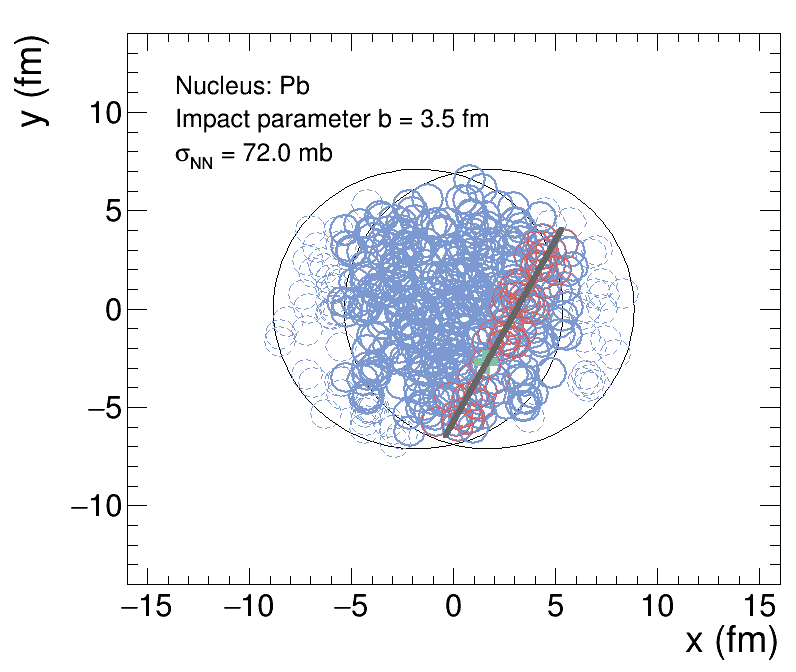

In [14]:
NucName = 'Pb'
XSNN = 72.0
f = ROOT.TFile('./collision-data/EventTree/Pb-Pb-IPless3.5fm-XSNN72.0mb-Nevt100.root','READ')
tree = ROOT.gROOT.FindObject("EventTree")

nEntries =  tree.GetEntries()
tree.GetEntry(0)

canvas = ROOT.TCanvas('c', 'c', 800, 700)
h2f = ROOT.TH2F("hGlauberMC", "", 160, -16, 16, 140, -14, 14)
h2f.Reset()
h2f.SetStats(0)
h2f.GetXaxis().SetTitle('x (fm)')
h2f.GetYaxis().SetTitle('y (fm)')
h2f.Draw()

ltx = ROOT.TLatex()
ltx.SetNDC()
ltx.SetTextFont(42)
ltx.SetTextSize(0.04)
ltx.DrawLatex(0.22, 0.86, 'Nucleus: {0}'.format(NucName))
ltx.DrawLatex(0.22, 0.81, 'Impact parameter b = {0:.1f} fm'.format(tree.b))
ltx.DrawLatex(0.22, 0.76, '#sigma_{NN}' + ' = {0:.1f} mb'.format(XSNN))

elp_NucA = ROOT.TEllipse(0.5*tree.b, 0, 1.2*pow(dic_Z.get(NucName), 1./3.),1.2*pow(dic_Z.get(NucName), 1./3.))
elp_NucB = ROOT.TEllipse(-0.5*tree.b, 0, 1.2*pow(dic_Z.get(NucName), 1./3.),1.2*pow(dic_Z.get(NucName), 1./3.))
elp_NucA.SetFillStyle(0)
elp_NucA.SetLineStyle(9)
elp_NucB.SetFillStyle(0)
elp_NucB.SetLineStyle(9)
elp_NucA.Draw('same')
elp_NucB.Draw('same')

list_ellipse, list_idxpart = Setup_ellipse(tree)
    
for i in range(len(list_ellipse)):
    list_ellipse[i].SetLineColor(38)
    list_ellipse[i].Draw('same')
    
# Draw reference point    
random1 = ROOT.TRandom3(0)
rand_idx = list_idxpart[random1.Integer(len(list_idxpart))]
RefNuc = ROOT.TEllipse(tree.Nucleon_x[rand_idx],tree.Nucleon_y[rand_idx],tree.Nucleon_D[rand_idx]/2.,tree.Nucleon_D[rand_idx]/2.)  

# Draw extension line from the ref. point
random2 = ROOT.TRandom3(0)
phi = 2.*ROOT.TMath.Pi()*random2.Rndm()
l1 = ROOT.TLine(tree.Nucleon_x[rand_idx]+13*ROOT.TMath.Cos(ROOT.TMath.Pi()+phi),tree.Nucleon_y[rand_idx]+13*ROOT.TMath.Sin(ROOT.TMath.Pi()+phi),tree.Nucleon_x[rand_idx]+13*ROOT.TMath.Cos(phi),tree.Nucleon_y[rand_idx]+13*ROOT.TMath.Sin(phi))

R1, R2, list_NucOnLine = R1R2(tree,list_idxpart,RefNuc,phi)
print (R1, R2)
for i in range(len(list_NucOnLine)):
    list_NucOnLine[i].Draw('same')
    
RefNucx, RefNucy = array( 'd' ), array( 'd' )
RefNucx.append(tree.Nucleon_x[rand_idx])
RefNucy.append(tree.Nucleon_y[rand_idx]) 
gr = ROOT.TGraph(1, RefNucx, RefNucy)
gr.SetLineColor(30)
gr.SetLineWidth(4)
gr.SetMarkerColor(30)
gr.SetMarkerStyle(34)
gr.SetMarkerSize(3)
gr.Draw('psame') 
    
l2 = ROOT.TLine(tree.Nucleon_x[rand_idx]+R2*ROOT.TMath.Cos(ROOT.TMath.Pi()+phi),tree.Nucleon_y[rand_idx]+R2*ROOT.TMath.Sin(ROOT.TMath.Pi()+phi),tree.Nucleon_x[rand_idx]+R1*ROOT.TMath.Cos(phi),tree.Nucleon_y[rand_idx]+R1*ROOT.TMath.Sin(phi))
l2.SetLineColor(13)
l2.SetLineWidth(5)
l2.Draw('lsame')
    
canvas.SaveAs('./plots/GlauberMC-R1R2-example.png')
canvas.SaveAs('./plots/GlauberMC-R1R2-example.pdf')
canvas.Draw()

### Obsolete: use cxx to run ###

In [163]:
NucName = 'Pb'
XSNN = 72.0
f = ROOT.TFile('./collision-data/EventTree/Pb-Pb-IPless3.5fm-XSNN72.0mb-Nevt10000.root','READ')
tree = ROOT.gROOT.FindObject('EventTree')
nEntries =  tree.GetEntries()

hM_R1R2 = ROOT.TH2F('hM_R1R2','',200,0,20,200,0,20)

for iEntry in range(0,nEntries):
    tree.GetEntry(iEntry)
    
    list_ellipse, list_idxpart = Setup_ellipse(tree)
    
    # Draw reference point    
    random1 = ROOT.TRandom3(0)
    rand_idx = list_idxpart[random1.Integer(len(list_idxpart))]
    RefNuc = ROOT.TEllipse(tree.Nucleon_x[rand_idx],tree.Nucleon_y[rand_idx],tree.Nucleon_D[rand_idx]/2.,tree.Nucleon_D[rand_idx]/2.)  

    # Draw extension line from the ref. point
    for iRan in range(10): 
        random2 = ROOT.TRandom3(0)
        phi = 2.*ROOT.TMath.Pi()*random2.Rndm()
        l1 = ROOT.TLine(tree.Nucleon_x[rand_idx]+13*ROOT.TMath.Cos(ROOT.TMath.Pi()+phi),tree.Nucleon_y[rand_idx]+13*ROOT.TMath.Sin(ROOT.TMath.Pi()+phi),tree.Nucleon_x[rand_idx]+13*ROOT.TMath.Cos(phi),tree.Nucleon_y[rand_idx]+13*ROOT.TMath.Sin(phi))

        R1, R2, list_NucOnLine = R1R2(tree,list_idxpart,RefNuc,phi)
        if iEntry % 1000 == 0 and iRan == 0:
            print (iEntry, R1, R2)
        hM_R1R2.Fill(R1,R2)
        

f_hM = ROOT.TFile('./plots/histogram-R1R2.root','RECREATE')
f_hM.cd()
hM_R1R2.Write()
f_hM.Close()


0 1.993109994789506 9.156488149777934
1000 6.780181108300054 3.444187402929611
2000 4.538033458365072 8.098857903593057
3000 10.069704467810263 3.5956846457876606
4000 10.169879876621902 2.6327071648722757
5000 6.668184535583068 7.327854790264858
6000 12.471609014351232 1.9526828846001059
7000 9.207803950463571 1.5693577892815664
8000 11.53392326418072 1.5025813878143603
9000 4.940942226640243 7.349524144428419


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file ./plots/GlauberMC-colz-R1R2.png has been created
Info in <TCanvas::Print>: pdf file ./plots/GlauberMC-colz-R1R2.pdf has been created


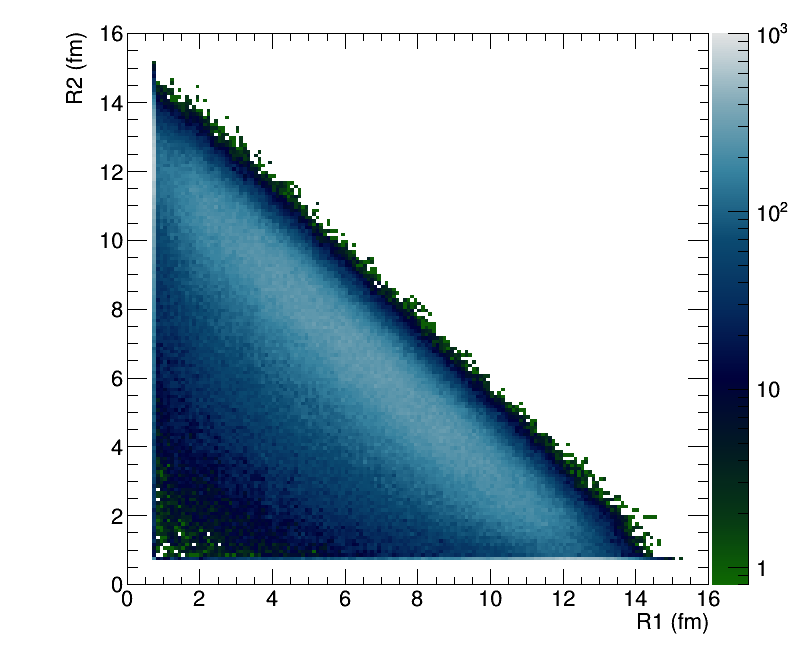

In [11]:
f_hM = ROOT.TFile('./plots/histogram-R1R2.root','READ')
f_hM.cd()
hM_R1R2 = f_hM.Get('hM_R1R2')
hM_R1R2.SetDirectory(0)
f_hM.Close()

c1 = ROOT.TCanvas('c1', 'c1', 800, 700)
ROOT.gStyle.SetPalette(61)
c1.SetLogz()
ROOT.gPad.SetRightMargin(0.11)
hM_R1R2.GetXaxis().SetTitle('R1 (fm)')
hM_R1R2.GetYaxis().SetTitle('R2 (fm)')
hM_R1R2.GetXaxis().SetRangeUser(0,16)
hM_R1R2.GetYaxis().SetRangeUser(0,16)
hM_R1R2.GetZaxis().SetRangeUser(0.8,1000)
# hM_R1R2.SetMarkerStyle(20)
# hM_R1R2.SetMarkerSize(0.3)
hM_R1R2.SetContour(2000)
hM_R1R2.Draw('colz')

# hM_profileX = hM_R1R2.ProfileX()
# hM_profileX.SetLineColor(46)
# hM_profileX.SetMarkerColor(46)
# hM_profileX.SetMarkerSize(1.1)
# hM_profileX.SetMarkerStyle(22)
# hM_profileX.Draw('pe1X0same')

# hM_profileY = hM_R1R2.ProfileY()
# hM_profileY.SetLineColor(41)
# hM_profileY.SetMarkerColor(41)
# hM_profileY.SetMarkerSize(1.1)
# hM_profileY.SetMarkerStyle(34)
# hM_profileY.Draw('pe1X0same')

legend = ROOT.TLegend(0.5,0.7,0.88,0.9)
# legend.AddEntry(hM_R1R2,'R1 v.s R2','p')
# legend.AddEntry(hM_profileX,'Profile (along X-axis)','pe1X0')
# legend.AddEntry(hM_profileY,'Profile (along Y-axis)','pe1X0')
legend.Draw('same')


# c1.SaveAs('./plots/GlauberMC-scatter-R1R2.png')
# c1.SaveAs('./plots/GlauberMC-scatter-R1R2.pdf')
c1.SaveAs('./plots/GlauberMC-colz-R1R2.png')
c1.SaveAs('./plots/GlauberMC-colz-R1R2.pdf')
c1.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: hM_DeltaL (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


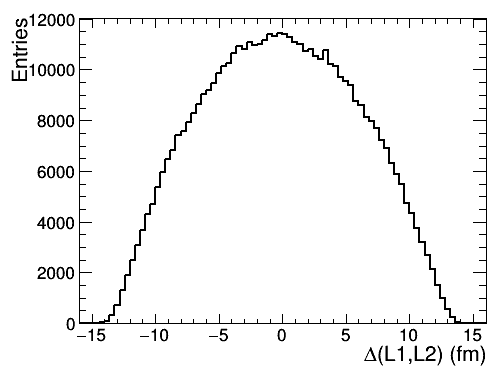

In [36]:
hM_DeltaL = ROOT.TH1F('hM_DeltaL','',80,-16,16)

for i in range(500000):
    L1 = ROOT.Double(0.0)
    L2 = ROOT.Double(0.0)
    hM_R1R2.GetRandom2(L1,L2)
    hM_DeltaL.Fill(L1-L2)


c = ROOT.TCanvas('c', 'c', 500, 400)
c.cd()
hM_DeltaL.SetLineWidth(2)
hM_DeltaL.GetXaxis().SetTitle('#Delta(L1,L2) (fm)')
hM_DeltaL.GetYaxis().SetTitle('Entries')
hM_DeltaL.Draw()
c.Draw()